Esse arquivo serve para a construção do modelo e para o balanceamento da coluna alvo.

In [232]:
import pandas as pd
import os

In [233]:
# Importando as constantes de constant.py no notebook

%run ../utils/constants.py

In [234]:
NORMALIZED_FILEPATH = os.path.join(DATA_DIRPATH, "kepler_normalized.csv")

In [235]:
df = pd.read_csv(NORMALIZED_FILEPATH)

In [236]:
# Separando X (Features) e y (Target)

X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

In [237]:
# Dividindo a base entre treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
    )

<Axes: xlabel='koi_disposition'>

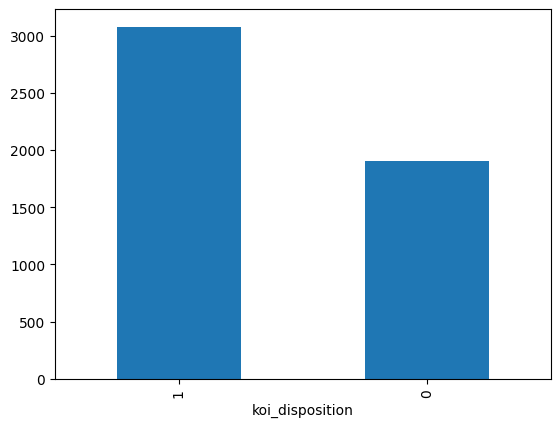

In [238]:
# Verificando a contagem do target de treino

y_train.value_counts().plot(kind="bar")

In [239]:
# Balanceando os dados de treino, usando o algoritmo ClusterCentroids

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)

X_res, y_res = cc.fit_resample(X_train, y_train)

<Axes: xlabel='koi_disposition'>

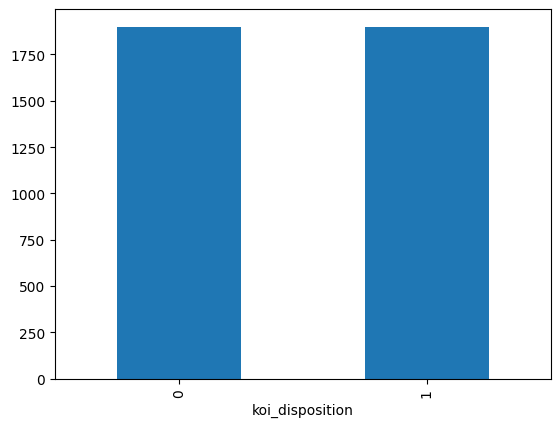

In [240]:
# Verificando a contagem do target de treino balanceado

y_res.value_counts().plot(kind="bar")

Iremos testar dois modelos: de Regressão Logística e de Árvore de Decisão.

In [241]:
# Usando modelo de Regressão Logistica (Modelo de classificação) para realizar a predição e treinando-o

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_res, y_res)

In [242]:
# Validando o modelo

y_pred = log_reg.predict(X_test)

from sklearn import metrics

metrics.confusion_matrix(y_test, y_pred)

array([[ 822,    9],
       [  86, 1217]])

In [243]:
# Acurácia
metrics.accuracy_score(y_test, y_pred)

0.9554826616682287

In [244]:
# Precisão 
metrics.precision_score(y_test, y_pred)

0.9926590538336052

In [245]:
# Recall
metrics.recall_score(y_test, y_pred)

0.9339984650805833

In [246]:
# Usando modelo de Árvore de Decisão (Modelo de classificação) para realizar a predição e treinando-o

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_res, y_res)

In [247]:
# Validando o modelo

y_pred2 = tree.predict(X_test)

metrics.confusion_matrix(y_test, y_pred2)

array([[ 829,    2],
       [   6, 1297]])

In [248]:
# Acurácia
metrics.accuracy_score(y_test, y_pred2)

0.9962511715089035

In [249]:
# Precisão (Falso Positivo e Verdadeiro Positivo)
metrics.precision_score(y_test, y_pred2)

0.9984603541185527

In [250]:
# Recall (Falso Negativo e Verdadeiro Positivo)
metrics.recall_score(y_test, y_pred2)

0.9953952417498081

A partir das validações, podemos concluir que a Árvore de Decisão se saiu melhor do que a Regressão Logística, tendo um score superior em acurácia, precisão e recall. Assim, o modelo implementado para classificar um KOI em FALSE POSITIVE (1) ou CONFIRMED (0) será o de Árvore de Decisão.